<a href="https://colab.research.google.com/github/Vishwarajsinh/python/blob/master/algorithmic_trading_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dual moving average crossover strategy

## for generating buy and sell signals

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime
import numpy as np

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['KOTAKBANK.NS', 'ASIANPAINT.NS', 'BAJAJFINSV.NS', 'PIDILITIND.NS', 'TCS.NS']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# User pandas_reader.data.DataReader to load the desired data. As simple as that.

#panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
panel_data = web.get_data_yahoo(tickers, start_date, end_date)
panel_data

Attributes    Adj Close                ...        Volume           
Symbols    KOTAKBANK.NS ASIANPAINT.NS  ... PIDILITIND.NS     TCS.NS
Date                                   ...                         
2013-01-01   322.542389    387.468353  ...      305693.0   509580.0
2013-01-02   325.991364    382.991852  ...      252282.0  1880246.0
2013-01-03   324.998871    385.159973  ...       65924.0  2635130.0
2013-01-04   322.666443    385.624298  ...      120367.0  5228760.0
2013-01-07   321.798004    384.954224  ...       55613.0  1820752.0
...                 ...           ...  ...           ...        ...
2020-06-08  1336.750000   1634.250000  ...      600567.0  2957841.0
2020-06-09  1304.150024   1642.050049  ...      896313.0  2909439.0
2020-06-10  1332.250000   1635.949951  ...      712634.0  5168397.0
2020-06-11  1298.699951   1610.599976  ...      623048.0  2269513.0
2020-06-12  1279.800049   1637.349976  ...      913916.0  2842757.0

[1830 rows x 30 columns]

In [3]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna( method ='ffill')
close.head(10)

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2013-01-01,324.975006,442.304993,911.650024,226.649994,632.075012
2013-01-02,328.450012,437.195007,910.299988,230.899994,631.650024
2013-01-03,327.450012,439.670013,914.900024,227.949997,640.299988
2013-01-04,325.100006,440.200012,930.599976,231.750000,649.599976
2013-01-07,324.225006,439.434998,917.299988,228.300003,647.424988
2013-01-08,326.375000,439.410004,914.400024,229.000000,650.125000
2013-01-09,324.549988,436.415009,916.299988,227.100006,638.299988
2013-01-10,326.924988,436.269989,909.950012,229.250000,629.200012
2013-01-11,315.000000,429.945007,888.250000,223.750000,653.174988
2013-01-14,314.274994,436.554993,867.000000,217.350006,667.250000


In [4]:
print(all_weekdays)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12'],
              dtype='datetime64[ns]', length=1944, freq='B')


In [5]:
close.describe()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
count,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,864.535519,1012.013505,3581.982534,744.866717,1414.721151
std,394.958675,393.667687,2649.459348,375.024001,425.539693
min,300.325012,392.000000,564.400024,212.800003,629.200012
25%,555.712494,671.224991,1105.099976,413.849991,1163.515015
50%,763.125000,993.625000,2894.950073,684.674988,1268.659973
75%,1185.724976,1290.850037,5483.012573,1079.950012,1819.274994
max,1729.500000,1893.699951,9894.250000,1699.750000,2277.949951


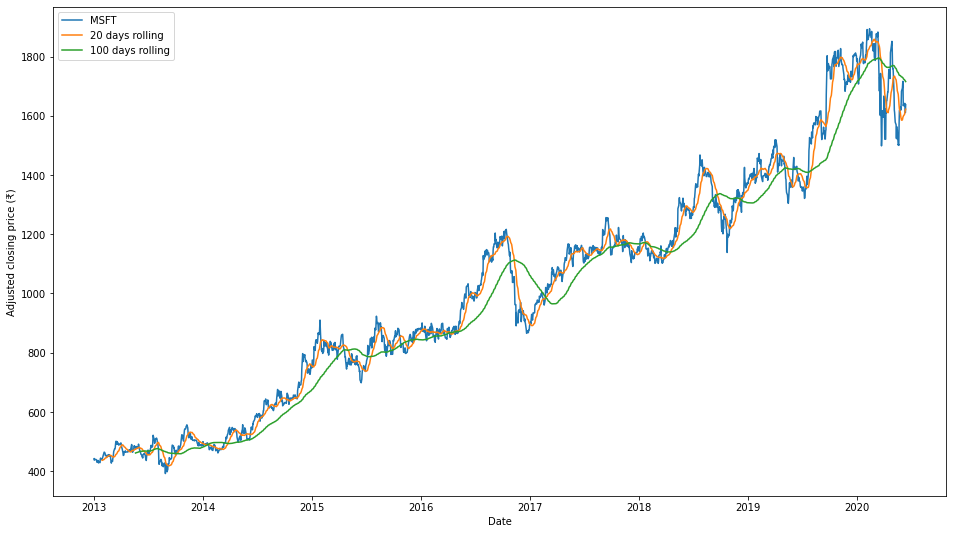

In [6]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
ASIANPAINT = close.loc[:, 'ASIANPAINT.NS']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_ASIANPAINT = ASIANPAINT.rolling(window=20).mean()
long_rolling_ASIANPAINT = ASIANPAINT.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ASIANPAINT.index, ASIANPAINT, label='MSFT')
ax.plot(short_rolling_ASIANPAINT.index, short_rolling_ASIANPAINT, label='20 days rolling')
ax.plot(long_rolling_ASIANPAINT.index, long_rolling_ASIANPAINT, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (₹)')
ax.legend()

In [0]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [8]:
data = close
data.head(10)

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2013-01-01,324.975006,442.304993,911.650024,226.649994,632.075012
2013-01-02,328.450012,437.195007,910.299988,230.899994,631.650024
2013-01-03,327.450012,439.670013,914.900024,227.949997,640.299988
2013-01-04,325.100006,440.200012,930.599976,231.750000,649.599976
2013-01-07,324.225006,439.434998,917.299988,228.300003,647.424988
2013-01-08,326.375000,439.410004,914.400024,229.000000,650.125000
2013-01-09,324.549988,436.415009,916.299988,227.100006,638.299988
2013-01-10,326.924988,436.269989,909.950012,229.250000,629.200012
2013-01-11,315.000000,429.945007,888.250000,223.750000,653.174988
2013-01-14,314.274994,436.554993,867.000000,217.350006,667.250000


In [9]:
# Calculating the short-window moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.head()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculating the short-window moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2020-06-08,1392.575999,1721.778997,6577.939014,1465.441497,1955.169001
2020-06-09,1389.366499,1720.091997,6535.704014,1465.966997,1954.179001
2020-06-10,1386.833999,1718.658997,6492.459014,1466.228997,1953.197502
2020-06-11,1383.762499,1717.003997,6448.697012,1465.957997,1951.964502
2020-06-12,1380.131000,1715.509496,6405.219014,1465.682498,1950.525503


In [11]:
# Relative returns
returns = data.pct_change()
returns.head()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.010693,-0.011553,-0.001481,0.018751,-0.000672
2013-01-03,-0.003045,0.005661,0.005053,-0.012776,0.013694
2013-01-04,-0.007177,0.001205,0.017160,0.016670,0.014524
2013-01-07,-0.002691,-0.001738,-0.014292,-0.014887,-0.003348


In [12]:
# Create and show the annualized covariance matrix

cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
Symbols,,,,,
KOTAKBANK.NS,0.074078,0.026563,0.033876,0.020483,0.012456
ASIANPAINT.NS,0.026563,0.066522,0.027541,0.030128,0.010395
BAJAJFINSV.NS,0.033876,0.027541,0.107562,0.027162,0.011680
PIDILITIND.NS,0.020483,0.030128,0.027162,0.067012,0.011132
TCS.NS,0.012456,0.010395,0.011680,0.011132,0.059897


In [13]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(data).diff()
log_returns.head()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.010636,-0.011620,-0.001482,0.018578,-0.000673
2013-01-03,-0.003049,0.005645,0.005041,-0.012858,0.013601
2013-01-04,-0.007203,0.001205,0.017015,0.016533,0.014420
2013-01-07,-0.002695,-0.001739,-0.014395,-0.014999,-0.003354


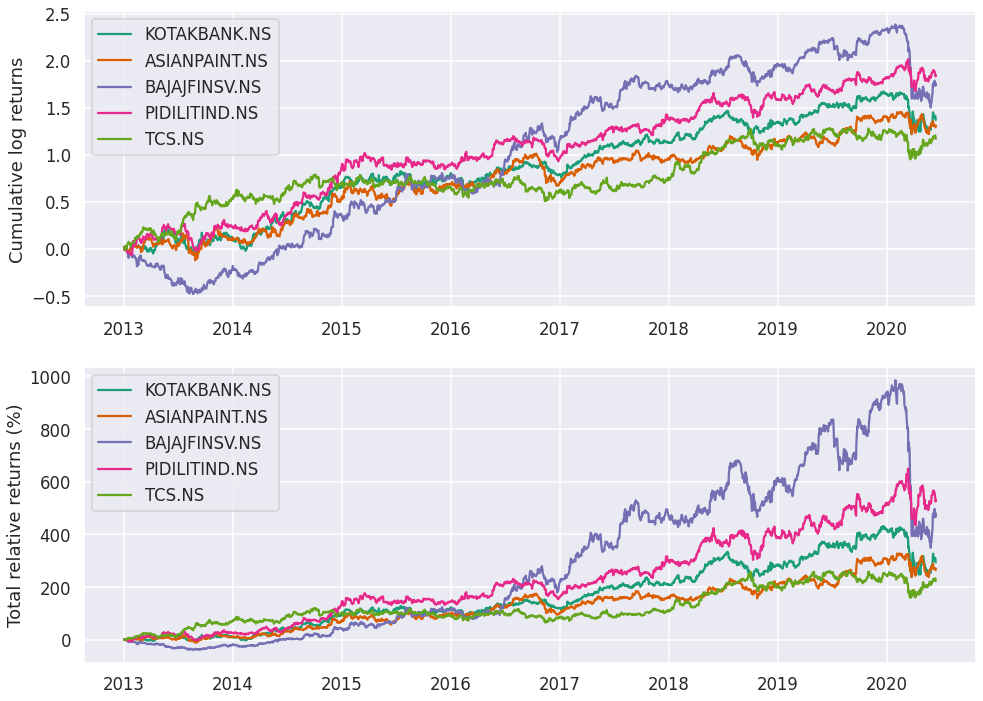

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [15]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

,2020-06-12
Symbols,
KOTAKBANK.NS,-0.014660
ASIANPAINT.NS,0.016472
BAJAJFINSV.NS,0.024503
PIDILITIND.NS,0.008956
TCS.NS,-0.013708


In [16]:
# Weights as defined above
weights_vector = pd.DataFrame(1 / 5, index=r_t.index, columns=r_t.columns)
weights_vector

,2020-06-12
Symbols,
KOTAKBANK.NS,0.2
ASIANPAINT.NS,0.2
BAJAJFINSV.NS,0.2
PIDILITIND.NS,0.2
TCS.NS,0.2


In [17]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2020-06-12
2020-06-12,0.004313


In [18]:
weights_matrix = pd.DataFrame(1 / 5, index=data.index, columns=data.columns)
weights_matrix.tail()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2020-06-08,0.2,0.2,0.2,0.2,0.2
2020-06-09,0.2,0.2,0.2,0.2,0.2
2020-06-10,0.2,0.2,0.2,0.2,0.2
2020-06-11,0.2,0.2,0.2,0.2,0.2
2020-06-12,0.2,0.2,0.2,0.2,0.2


In [19]:
log_returns.head()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.010636,-0.011620,-0.001482,0.018578,-0.000673
2013-01-03,-0.003049,0.005645,0.005041,-0.012858,0.013601
2013-01-04,-0.007203,0.001205,0.017015,0.016533,0.014420
2013-01-07,-0.002695,-0.001739,-0.014395,-0.014999,-0.003354


In [20]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-07
2013-01-01,NaN,0.003088,0.001676,0.008394,-0.007436
2013-01-02,NaN,0.003088,0.001676,0.008394,-0.007436
2013-01-03,NaN,0.003088,0.001676,0.008394,-0.007436
2013-01-04,NaN,0.003088,0.001676,0.008394,-0.007436
2013-01-07,NaN,0.003088,0.001676,0.008394,-0.007436


In [21]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

2020-06-08    0.007130
2020-06-09   -0.012178
2020-06-10    0.001978
2020-06-11   -0.019882
2020-06-12    0.004313
Freq: B, dtype: float64

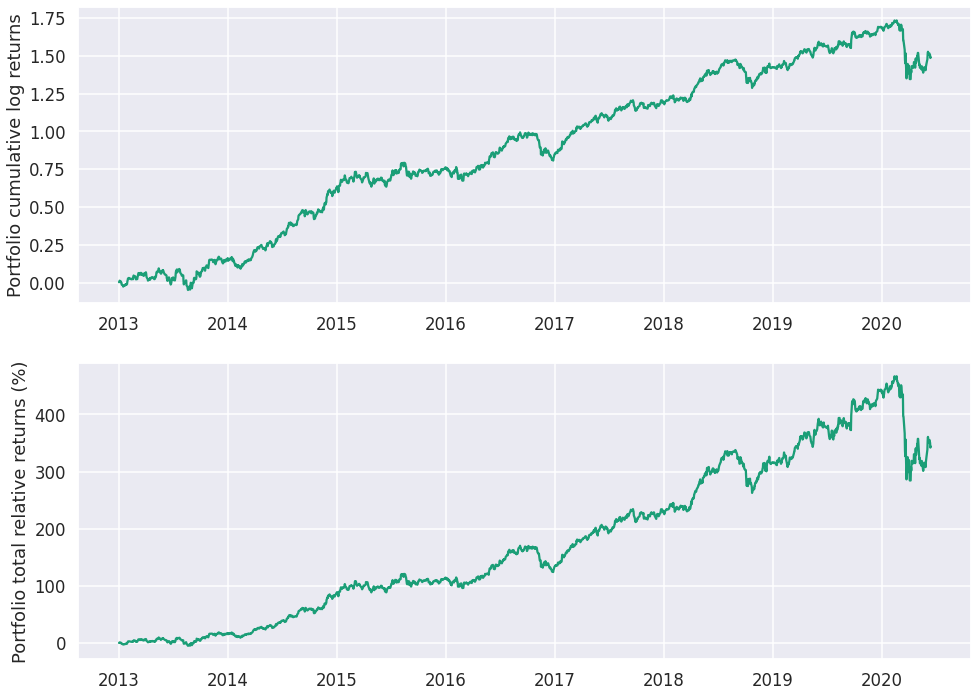

In [22]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [23]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 343.76%
Average yearly return is: 22.05%


In [0]:
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [25]:
# Calculating the short-window simple moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN
2013-01-09,NaN,NaN,NaN,NaN,NaN
2013-01-10,NaN,NaN,NaN,NaN,NaN
2013-01-11,NaN,NaN,NaN,NaN,NaN
2013-01-14,NaN,NaN,NaN,NaN,NaN


In [26]:
# Calculating the long-window simple moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2020-06-08,1392.575999,1721.778997,6577.939014,1465.441497,1955.169001
2020-06-09,1389.366499,1720.091997,6535.704014,1465.966997,1954.179001
2020-06-10,1386.833999,1718.658997,6492.459014,1466.228997,1953.197502
2020-06-11,1383.762499,1717.003997,6448.697012,1465.957997,1951.964502
2020-06-12,1380.131000,1715.509496,6405.219014,1465.682498,1950.525503


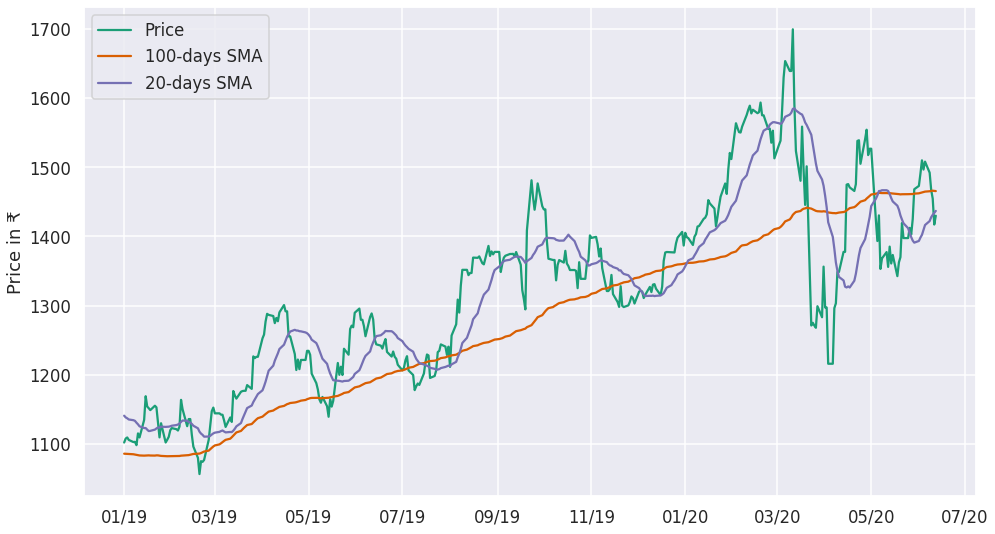

In [27]:
start_date = '2019-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'PIDILITIND.NS'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'PIDILITIND.NS'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'PIDILITIND.NS'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in ₹')
ax.xaxis.set_major_formatter(my_year_month_fmt)

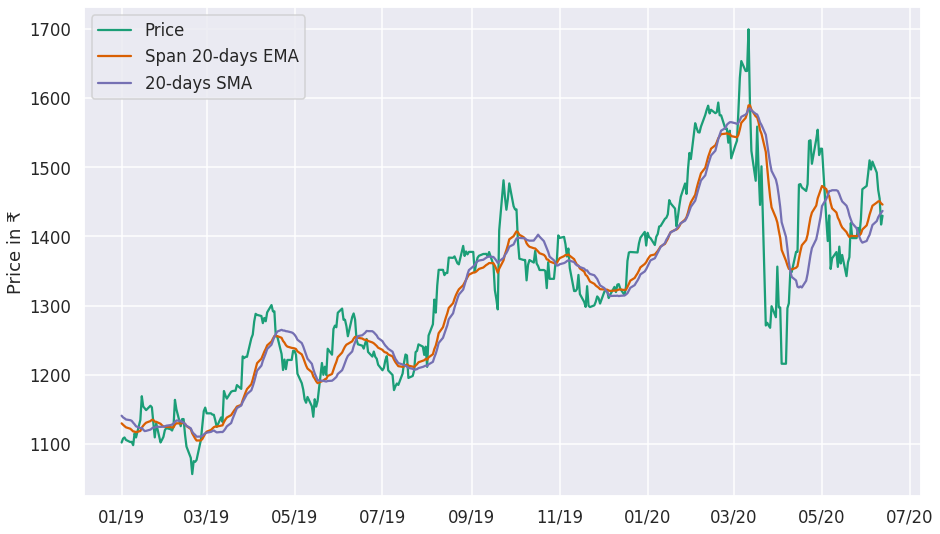

In [29]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'PIDILITIND.NS'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'PIDILITIND.NS'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'PIDILITIND.NS'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in ₹')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [30]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2020-06-08,78.359138,-4.468522,612.488071,43.293285,72.574851
2020-06-09,41.401147,3.014238,436.400758,16.551067,65.934433
2020-06-10,62.881968,-2.791968,315.400863,3.619969,92.859681
2020-06-11,26.538403,-25.461758,226.553161,-30.608079,46.830099
2020-06-12,6.911024,1.165552,320.741132,-16.157309,16.901131


In [31]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign) * 1/5
trading_positions.tail()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2020-06-08,0.2,-0.2,0.2,0.2,0.2
2020-06-09,0.2,0.2,0.2,0.2,0.2
2020-06-10,0.2,-0.2,0.2,0.2,0.2
2020-06-11,0.2,-0.2,0.2,-0.2,0.2
2020-06-12,0.2,0.2,0.2,-0.2,0.2


In [0]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

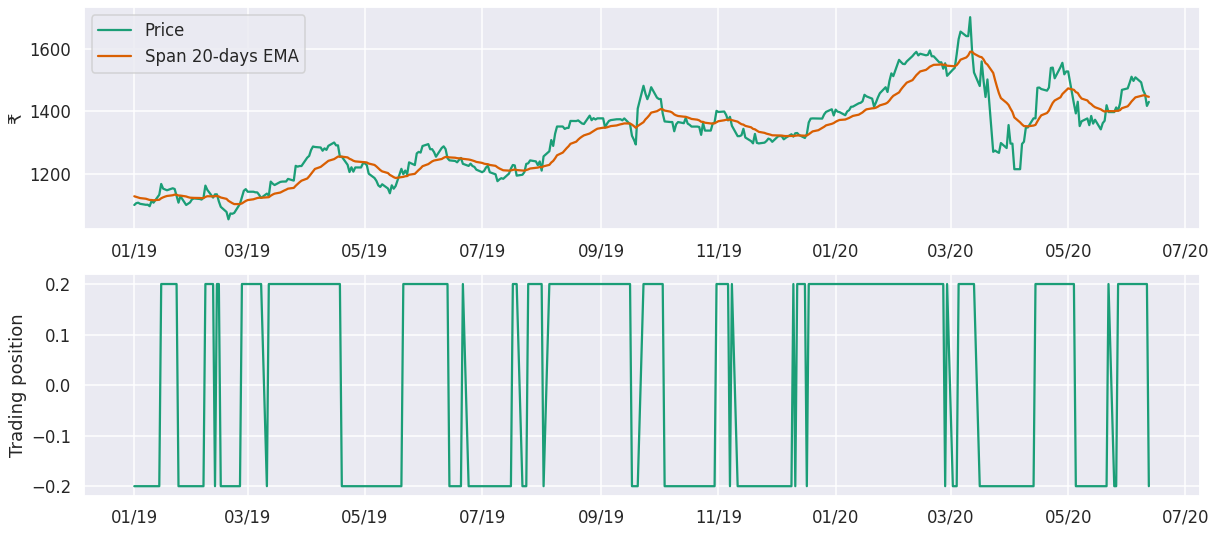

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,9))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'PIDILITIND.NS'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'PIDILITIND.NS'], label = 'Span 20-days EMA')

ax1.set_ylabel('₹')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'PIDILITIND.NS'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [34]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
asset_log_returns = np.log(data).diff()
asset_log_returns.head()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.010636,-0.011620,-0.001482,0.018578,-0.000673
2013-01-03,-0.003049,0.005645,0.005041,-0.012858,0.013601
2013-01-04,-0.007203,0.001205,0.017015,0.016533,0.014420
2013-01-07,-0.002695,-0.001739,-0.014395,-0.014999,-0.003354


In [35]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

Symbols,KOTAKBANK.NS,ASIANPAINT.NS,BAJAJFINSV.NS,PIDILITIND.NS,TCS.NS
2020-06-08,-0.000157,0.000526,0.007664,-0.002133,0.002282
2020-06-09,-0.004938,-0.000952,-0.004842,-0.003379,0.000029
2020-06-10,0.004264,-0.000744,-0.003334,-0.001718,0.003511
2020-06-11,-0.005101,0.003123,-0.002505,-0.005216,-0.003937
2020-06-12,-0.002932,-0.003294,0.004901,-0.001791,-0.002742


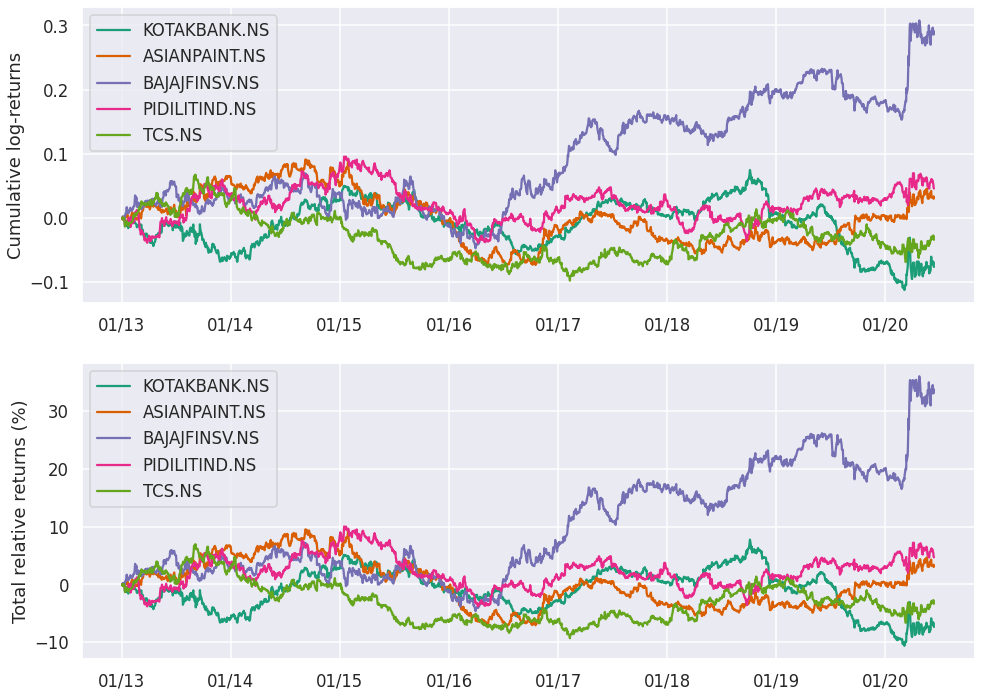

In [37]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

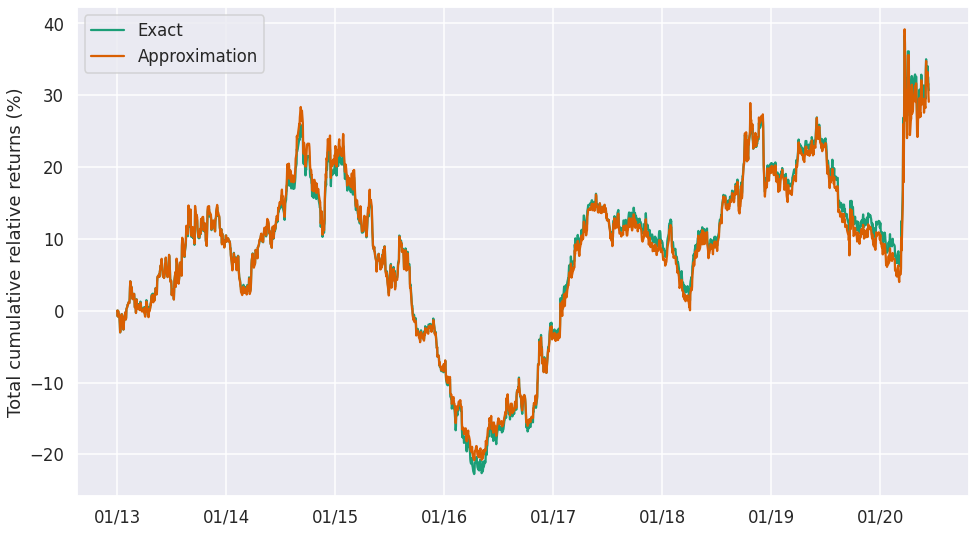

In [38]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [39]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 30.71%
Average yearly return is:  3.65%


Total portfolio return is: 174.53%
Average yearly return is: 14.46%


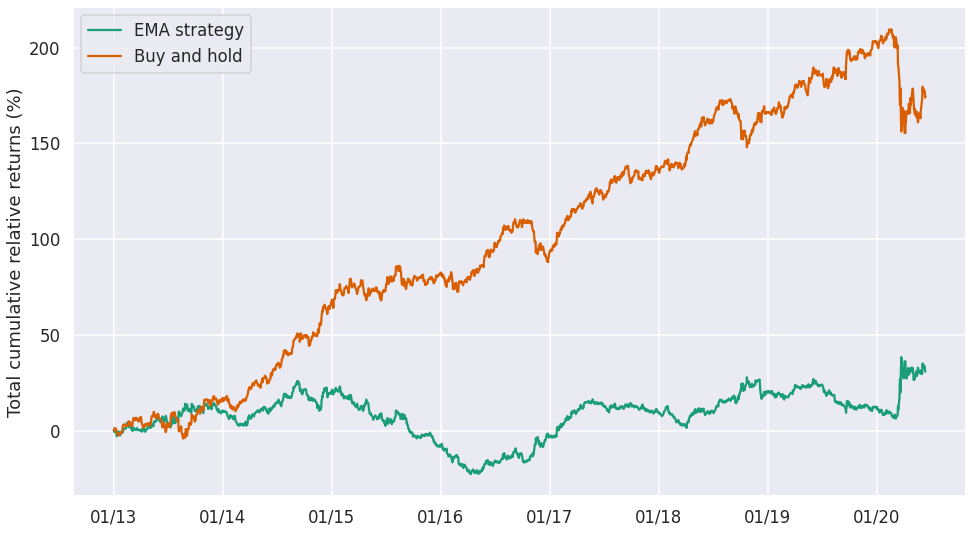

In [40]:
# Define the weights matrix for the simple buy-and-hold strategy
simple_weights_matrix = pd.DataFrame(1/5, index = data.index, columns=data.columns)

# Get the buy-and-hold strategy log returns per asset
simple_strategy_asset_log_returns = simple_weights_matrix * asset_log_returns

# Get the cumulative log-returns per asset
simple_cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

# Total strategy relative returns. This is the exact calculation.
simple_cum_relative_return_exact = simple_cum_strategy_asset_relative_returns.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='EMA strategy')
ax.plot(simple_cum_relative_return_exact.index, 100*simple_cum_relative_return_exact, label='Buy and hold')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(simple_cum_relative_return_exact)